# 数据集说明
CIFAR-10数据集的说明

## 加载数据 

In [22]:
"""
查看和可视化 CIFAR-10 数据集
"""
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import os
from src import load_cifar10_data

def imshow(img, title=None):
    """
    显示图像的辅助函数
    """
    # 反归一化：将张量转换回图像格式
    img = img / 2 + 0.5  # 反归一化
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    if title:
        plt.title(title)
    plt.axis('off')

def explore_cifar10():
    """
    探索 CIFAR-10 数据集的基本信息和样例
    """
    print("=== CIFAR-10 数据集探索 ===\n")
    
    # 创建不带数据增强的变换，用于查看原始图像
    transform_simple = transforms.Compose([
        transforms.ToTensor(),
    ])
    
    # 加载数据集（不使用归一化，便于查看）
    print("加载数据集用于查看...")
    trainset = torchvision.datasets.CIFAR10(
        root='./data', 
        train=True,
        download=False,  # 假设已经下载
        transform=transform_simple
    )
    
    testset = torchvision.datasets.CIFAR10(
        root='./data', 
        train=False,
        download=False,
        transform=transform_simple
    )
    
    # 数据集基本信息
    classes = ('plane', 'car', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck')
    
    print("📊 数据集基本信息：")    
    print(f"   训练集大小: {len(trainset)} 张图片")
    print(f"   测试集大小: {len(testset)} 张图片")
    print(f"   图像分辨率: 32 × 32 像素")
    print(f"   颜色通道: RGB (3通道)")
    print(f"   类别数量: {len(classes)} 个")
    print(f"   类别列表: {classes}")
    print()
    
    # 查看类别分布
    print("📈 训练集类别分布：")
    train_labels = [label for _, label in trainset]
    for i, class_name in enumerate(classes):
        count = train_labels.count(i)
        percentage = count / len(trainset) * 100
        print("8s")
    print()
    
    # 显示样例图像
    print("🖼️  显示样例图像...")
    
    # 获取一个批次的数据
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=16, shuffle=True)
    dataiter = iter(trainloader)
    images, labels = next(dataiter)
    
    # 创建图像网格
    fig, axes = plt.subplots(4, 4, figsize=(10, 10))
    fig.suptitle('CIFAR-10 数据集样例图像', fontsize=16)
    
    for i in range(16):
        ax = axes[i//4, i%4]
        imshow(images[i], classes[labels[i]])
        ax.set_title(f"{classes[labels[i]]}", fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    # 显示单张图像的详细信息
    print("\n🔍 单张图像详细信息：")
    single_image, single_label = trainset[0]  # 获取第一张图片
    print(f"   图像形状: {single_image.shape}")
    print(f"   数据类型: {single_image.dtype}")
    print(f"   像素值范围: [{single_image.min():.3f}, {single_image.max():.3f}]")
    print(f"   类别标签: {single_label} ({classes[single_label]})")
    
    # 显示单张图像
    plt.figure(figsize=(3, 3))
    imshow(single_image, f"类别: {classes[single_label]}")
    plt.show()
    
    # 像素值统计
    print("📊 像素值统计：")
    print(f"   均值: {single_image.mean():.4f}")
    print(f"   标准差: {single_image.std():.4f}")
    print(f"   最小值: {single_image.min():.4f}")
    print(f"   最大值: {single_image.max():.4f}")

def visualize_data_loader():
    """
    查看数据加载器的输出
    """
    print("\n=== 数据加载器输出查看 ===\n")
    
    # 使用完整的下载函数获取数据加载器
    train_loader, test_loader, classes = load_cifar10_data(batch_size=8)
    
    # 获取一个批次
    dataiter = iter(train_loader)
    images, labels = next(dataiter)
    
    print("📦 数据加载器批次信息：")
    print(f"   批次图像形状: {images.shape}")  # [batch_size, 3, 32, 32]
    print(f"   批次标签形状: {labels.shape}")  # [batch_size]
    print(f"   图像数据类型: {images.dtype}")
    print(f"   标签数据类型: {labels.dtype}")
    print()
    
    print("🔢 当前批次的标签：")
    for i, label in enumerate(labels):
        print(f"   图像 {i+1}: 标签 {label.item()} -> {classes[label.item()]}")
    
    # 显示批次图像（归一化后的）
    print("🖼️  显示批次图像（已预处理）...")    # 反归一化以便显示
    stats = ((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
    mean = torch.tensor(stats[0]).view(3, 1, 1)
    std = torch.tensor(stats[1]).view(3, 1, 1)
    
    # 反归一化
    unnormalized_images = images * std + mean
    unnormalized_images = torch.clamp(unnormalized_images, 0, 1)
    
    fig, axes = plt.subplots(2, 4, figsize=(12, 6))
    fig.suptitle('数据加载器输出样例（已预处理）', fontsize=16)
    
    for i in range(8):
        ax = axes[i//4, i%4]
        imshow(unnormalized_images[i], classes[labels[i]])
    
    plt.tight_layout()
    plt.show()


=== CIFAR-10 数据集探索 ===

加载数据集用于查看...
📊 数据集基本信息：
   训练集大小: 50000 张图片
   测试集大小: 10000 张图片
   图像分辨率: 32 × 32 像素
   颜色通道: RGB (3通道)
   类别数量: 10 个
   类别列表: ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

📈 训练集类别分布：


8s
8s
8s
8s
8s
8s
8s
8s
8s
8s

🖼️  显示样例图像...


/tmp/ipykernel_38574/1867096856.py:90: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_38574/1867096856.py:90: UserWarning: Glyph 25454 (\N{CJK UNIFIED IDEOGRAPH-636E}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_38574/1867096856.py:90: UserWarning: Glyph 38598 (\N{CJK UNIFIED IDEOGRAPH-96C6}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_38574/1867096856.py:90: UserWarning: Glyph 26679 (\N{CJK UNIFIED IDEOGRAPH-6837}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_38574/1867096856.py:90: UserWarning: Glyph 20363 (\N{CJK UNIFIED IDEOGRAPH-4F8B}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_38574/1867096856.py:90: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_38574/1867096856.py:90: UserWarning: Glyph 20687 (\N{CJK UNIFIED IDEOGRAPH-50CF}) missing from current font.
  plt.

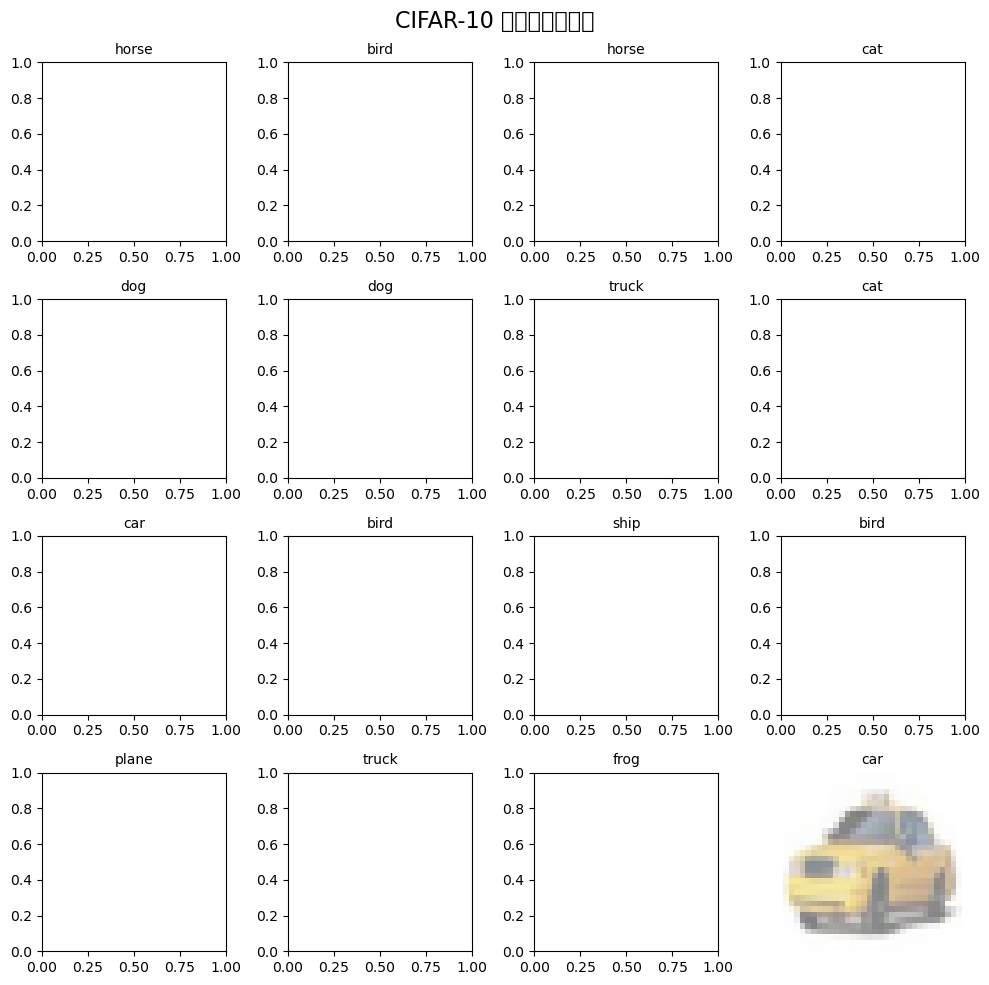


🔍 单张图像详细信息：
   图像形状: torch.Size([3, 32, 32])
   数据类型: torch.float32
   像素值范围: [0.000, 1.000]
   类别标签: 6 (frog)


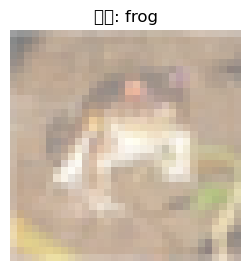

📊 像素值统计：
   均值: 0.4057
   标准差: 0.2039
   最小值: 0.0000
   最大值: 1.0000

=== 数据加载器输出查看 ===

数据将保存到: /home/frank/files/programs/AI引论第三次实验/data
正在下载 CIFAR-10 训练集...
Files already downloaded and verified
正在下载 CIFAR-10 测试集...
Files already downloaded and verified
创建数据加载器...
✅ 数据集下载完成！
训练集大小: 50000 张图片
测试集大小: 10000 张图片
类别数量: 10 个
类别列表: ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
📦 数据加载器批次信息：
   批次图像形状: torch.Size([8, 3, 32, 32])
   批次标签形状: torch.Size([8])
   图像数据类型: torch.float32
   标签数据类型: torch.int64

🔢 当前批次的标签：
   图像 1: 标签 8 -> ship
   图像 2: 标签 6 -> frog
   图像 3: 标签 5 -> dog
   图像 4: 标签 3 -> cat
   图像 5: 标签 3 -> cat
   图像 6: 标签 5 -> dog
   图像 7: 标签 1 -> car
   图像 8: 标签 3 -> cat
🖼️  显示批次图像（已预处理）...


/tmp/ipykernel_38574/1867096856.py:154: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_38574/1867096856.py:154: UserWarning: Glyph 25454 (\N{CJK UNIFIED IDEOGRAPH-636E}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_38574/1867096856.py:154: UserWarning: Glyph 21152 (\N{CJK UNIFIED IDEOGRAPH-52A0}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_38574/1867096856.py:154: UserWarning: Glyph 36733 (\N{CJK UNIFIED IDEOGRAPH-8F7D}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_38574/1867096856.py:154: UserWarning: Glyph 22120 (\N{CJK UNIFIED IDEOGRAPH-5668}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_38574/1867096856.py:154: UserWarning: Glyph 36755 (\N{CJK UNIFIED IDEOGRAPH-8F93}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_38574/1867096856.py:154: UserWarning: Glyph 20986 (\N{CJK UNIFIED IDEOGRAPH-51FA}) missing from current font.

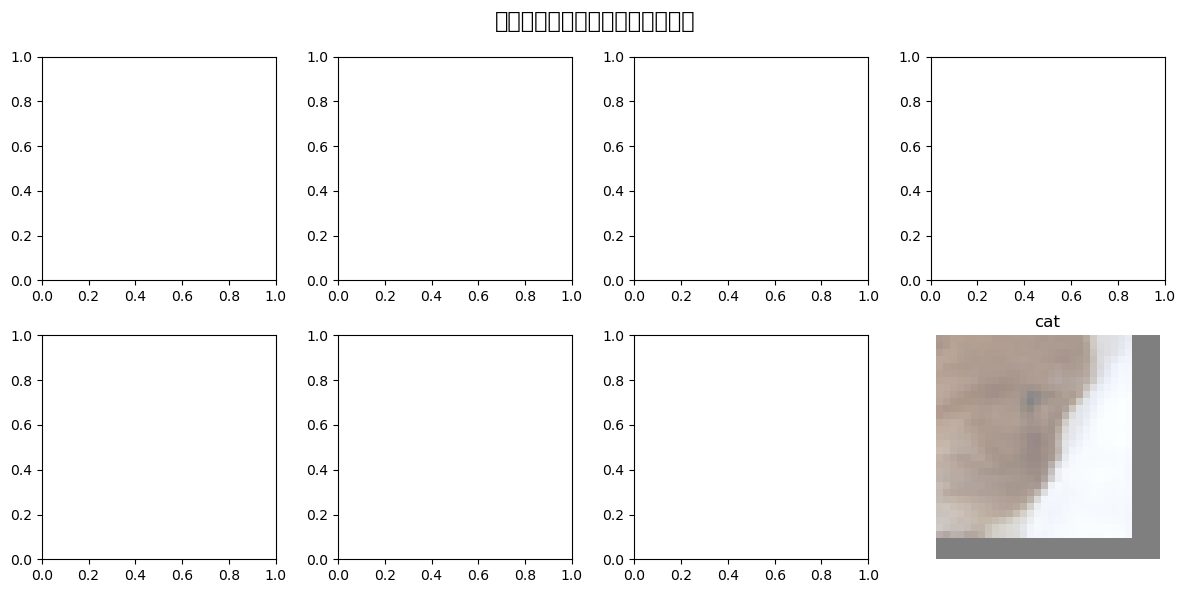

In [23]:
# 确保在正确的目录下运行
os.chdir('/home/frank/files/programs/AI引论第三次实验')

# 探索数据集
explore_cifar10()

# 查看数据加载器
visualize_data_loader()

**对于数据集说明**  
使用load_cifar10_data()函数，获得三个返回值，分别是续联数据，测试数据和标签含义  
```python
train, test, tag = load_cifar10_data()
```

对于train和test数据，为一个可迭代对象(类似元组列表 [(tensor,label)])    
即一份数据是一个tensor和其对应的label  

其中，一份tensor是一个4D张量，形状为： 
[batch_size, channels, height, width]，如[128, 3, 32, 32]  

具体含义：
- batch_size = 128  批次中的样本数量
- channels = 3      RGB 三个颜色通道
- height = 32       图像高度 (像素)
- width = 32        图像宽度 (像素) 
 
一个tensor实际上是batch_size张图，每个图是3D-tensor

In [ ]:
# 获取一个批次数据
train_loader, test_loader, classes = load_cifar10_data(batch_size=8)
dataiter = iter(train_loader)
images, labels = next(dataiter)

print("=== 批次数据格式 ===")
print(f"images.shape = {images.shape}")  # torch.Size([8, 3, 32, 32])
print(f"images.dtype = {images.dtype}")  # torch.float32
print(f"labels.shape = {labels.shape}")  # torch.Size([8])
print(f"labels.dtype = {labels.dtype}")  # torch.int64

print("\n=== 维度含义 ===")
print(f"批次大小: {images.shape[0]}")      # 8
print(f"颜色通道: {images.shape[1]}")      # 3 (RGB)
print(f"图像高度: {images.shape[2]}")      # 32 像素
print(f"图像宽度: {images.shape[3]}")      # 32 像素

print("\n=== 标签示例 ===")
for i in range(min(5, len(labels))):  # 显示前5个
    label_num = labels[i].item()
    label_name = classes[label_num]
    print(f"样本{i+1}: 标签={label_num}, 类别='{label_name}'")

数据将保存到: /home/frank/files/programs/AI引论第三次实验/data
正在下载 CIFAR-10 训练集...


Files already downloaded and verified
正在下载 CIFAR-10 测试集...
Files already downloaded and verified
创建数据加载器...
✅ 数据集下载完成！
训练集大小: 50000 张图片
测试集大小: 10000 张图片
类别数量: 10 个
类别列表: ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
=== 批次数据格式 ===
images.shape = torch.Size([8, 3, 32, 32])
images.dtype = torch.float32
labels.shape = torch.Size([8])
labels.dtype = torch.int64

=== 维度含义 ===
批次大小: 8
颜色通道: 3
图像高度: 32
图像宽度: 32

=== 标签示例 ===
样本1: 标签=2, 类别='bird'
样本2: 标签=4, 类别='deer'
样本3: 标签=3, 类别='cat'
样本4: 标签=9, 类别='truck'
样本5: 标签=9, 类别='truck'


('plane',
 'car',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck')